# Computer Vision Model 

In [23]:
# data 
import kagglehub
# general
import pandas as pd 
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("default")
# system 
import os 
# ml 
import comet_ml
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn 
from torch.utils.data import DataLoader as dataloader
from tqdm import tqdm
# backtest 
import quantstats as qs
# .pys
import cnn 
from data_pre_process import PreProcess

## Comet

In [33]:
comet_ml.login()

## Data

In [2]:
# Download latest version
path = kagglehub.dataset_download("umerhaddii/google-stock-data-2024")
dataset = 'GOOG_2004-08-19_2025-08-20.csv'
data = pd.read_csv(os.path.join(path, dataset)) # choose specifc dataset

In [3]:
# call pre-processed data 
data_obj = PreProcess(data)
batches = 100
data_pre = data_obj.pre_process(batches)
features, labels = data_pre['gram'], data_pre['labels']

# class balance
zs = (labels == 0).sum().item()
ns = len(labels) - zs
cts = np.array([zs, ns]) * 1/len(labels)
print('Class balance: #0 = {}%, #1 = {}%'.format(cts[0], cts[1]))

Class balance: #0 = 0.55%, #1 = 0.45%


get dimensions

In [19]:
for b in data_pre['norm_data']: 
    print(b.shape)

(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)
(52,)


Pytorch data processing 

In [4]:
# call dataloader 
train_split = int(0.7*len(features))
train_features, train_labels = features[ :train_split], labels[ :train_split]
test_features, test_labels = features[train_split: ], labels[train_split: ]
train_data = cnn.CustomImageDataset(train_features, train_labels)
test_data = cnn.CustomImageDataset(test_features, test_labels)

# process data for CNN
BATCHES = 1 # batch predictions ber batch data forward pass
train_data_loader = dataloader(dataset = train_data, batch_size = BATCHES, shuffle = True)
test_data_loader = dataloader(dataset = test_data, batch_size = BATCHES, shuffle = True)
# visualise 
for image, label in train_data:
    print(image.shape, label.shape)

torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) torch.Size([])
torch.Size([1, 52, 52]) t

## EDA 

polar transform of price data

<Figure size 1000x600 with 0 Axes>

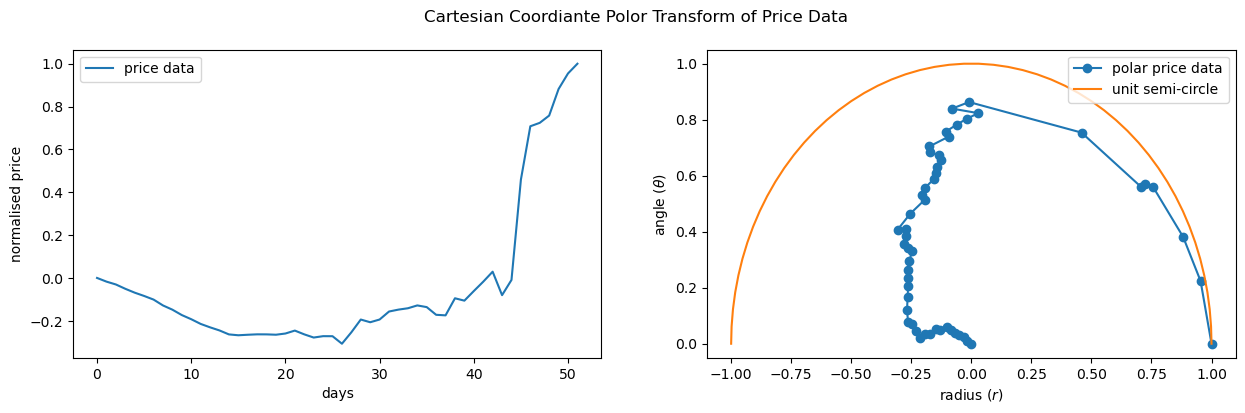

In [8]:
# polar embedding of price data 
batch = 0
x_b = data_pre['norm_data'][batch]
phi_b = np.arccos(x_b)
r_b = np.linspace(0, 1, len(x_b))
y_b = r_b * np.sin(phi_b)
x_b = r_b * x_b
# unit circle 
theta = np.linspace(0, np.pi, len(x_b))
xu = np.cos(theta)
yu = np.sin(theta)

fig, ax = plt.subplots(1, 2, figsize = (15, 4))
plt.suptitle(r'Cartesian Coordiante Polor Transform of Price Data')
ax[0].plot(x_b, label = 'price data')
ax[1].plot(x_b, y_b, marker = 'o', label = 'polar price data')
ax[1].plot(xu, yu, label = 'unit semi-circle')

# axis 
ax[0].set_ylabel('normalised price')
ax[0].set_xlabel('days')
ax[1].set_ylabel(r'angle ($\theta$)')
ax[1].set_xlabel(r'radius ($r$)')

# legends
ax[0].legend()
ax[1].legend()

plt.show()
plt.tight_layout();

gaf matrices

<Figure size 640x480 with 0 Axes>

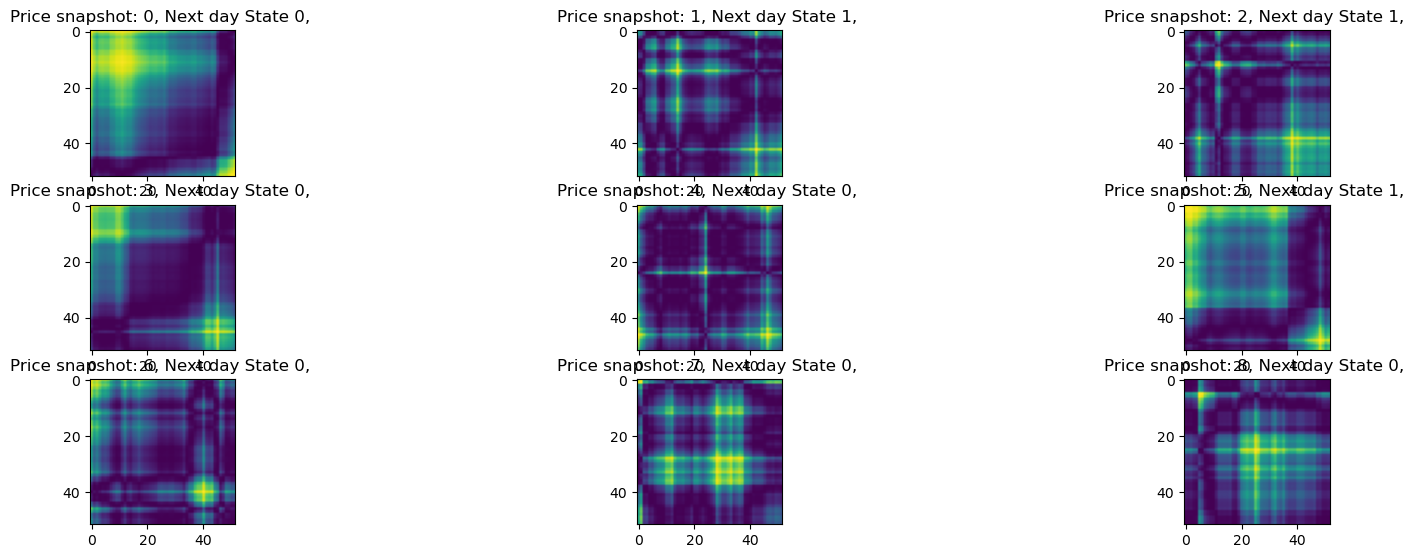

In [9]:
plt.figure(figsize = (20, 20))
subset = 9
for idx, img in enumerate(features[:subset]):
    plt.subplot(9, 3, idx + 1)
    plt.title('Price snapshot: {}, Next day State {}, '.format(idx, labels[idx]))
    plt.imshow(img)

plt.show()
plt.tight_layout();

## CNN  

call model 

In [21]:
cnn_model = cnn.CNN_model()
print(cnn_model)

CNN_model(
  (conv1): Conv2d(1, 24, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(24, 36, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): LazyLinear(in_features=0, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=30, bias=True)
    (3): ReLU()
    (4): Linear(in_features=30, out_features=30, bias=True)
    (5): ReLU()
    (6): Linear(in_features=30, out_features=2, bias=True)
  )
)


get model initial outputs

In [22]:
cnn_model.eval()
outputs = []
with torch.no_grad():
    for x, _ in train_data_loader:
        outputs.append(cnn_model(x))
outputs[:10]

[tensor([[-0.0643, -0.1998]]),
 tensor([[-0.0635, -0.2011]]),
 tensor([[-0.0656, -0.1975]]),
 tensor([[-0.0625, -0.2029]]),
 tensor([[-0.0682, -0.1974]]),
 tensor([[-0.0643, -0.1985]]),
 tensor([[-0.0639, -0.2021]]),
 tensor([[-0.0668, -0.1949]]),
 tensor([[-0.0667, -0.2043]]),
 tensor([[-0.0659, -0.1976]])]

## Optimisation-Grid Search

In [31]:
def grid_search(train_data: cnn.CustomImageDataset, ck_dims: list[int], pk_dims: list[int], train_split: float = 0.7):
    """training algorithm"""
    min_loss = 0
    phi_opt = {}
    opt_model = None 

    x1, x2, y1, y2 = train_test_split(train_data.image, train_data.label, train_size = train_split)
    tr_sub = cnn.CustomImageDataset(x1, y1)
    val = cnn.CustomImageDataset(x2, y2)
    tr_loader = dataloader(tr_sub, batch_size=BATCHES, shuffle=True)
    val_loader = dataloader(val, batch_size=BATCHES, shuffle=True)

    training_params = []
    for i in ck_dims:
        for j in pk_dims: 
            training_params.append(
                {
                    'f_sz': i, 
                    'p_sz': j,
                }
            )
    
    # tarin model with hyperparams
    for params in training_params: 
        # cnn update 
        cnn_model = cnn.CNN(**params) # instentiate model
        cnn_model.CNN_train(tr_loader, epochs = 10) # train model 
        res = cnn_model.CNN_evaluate(val_loader) # test model
        val_loss = res[0]
        if val_loss <= np.min(val_loss):
            phi_opt = params.copy()
            min_loss = val_loss
            opt_model = cnn_model

    return (min_loss, phi_opt), opt_model # training set validation for grid search

In [32]:
conv_kernels = np.arange(2, 5)
pool_kernels = np.arange(2, 5)

hyper_opt, cnn_model_opt = grid_search(train_data, conv_kernels, pool_kernels)

100%|██████████| 49/49 [00:00<00:00, 824.21it/s]


Epoch0: Epoch-Loss0.7036385901120245, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1014.76it/s]


Epoch1: Epoch-Loss0.6952551311376144, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1039.28it/s]


Epoch2: Epoch-Loss0.6912992614872602, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 970.61it/s]


Epoch3: Epoch-Loss0.7555350931931515, Epoch Accuracy0.42857142857142855


100%|██████████| 49/49 [00:00<00:00, 1029.73it/s]


Epoch4: Epoch-Loss0.7103345308985028, Epoch Accuracy0.4489795918367347


100%|██████████| 49/49 [00:00<00:00, 1043.95it/s]


Epoch5: Epoch-Loss0.6630315427877465, Epoch Accuracy0.5714285714285714


100%|██████████| 49/49 [00:00<00:00, 1054.81it/s]


Epoch6: Epoch-Loss0.6328493549431465, Epoch Accuracy0.7551020408163265


100%|██████████| 49/49 [00:00<00:00, 1073.76it/s]


Epoch7: Epoch-Loss0.6964610437957608, Epoch Accuracy0.5918367346938775


100%|██████████| 49/49 [00:00<00:00, 1074.87it/s]


Epoch8: Epoch-Loss0.5233562478833661, Epoch Accuracy0.7142857142857143


100%|██████████| 49/49 [00:00<00:00, 615.11it/s]


Epoch9: Epoch-Loss0.5269810350953924, Epoch Accuracy0.7346938775510204


100%|██████████| 49/49 [00:00<00:00, 1267.79it/s]


Epoch0: Epoch-Loss0.6997834468374446, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1254.12it/s]


Epoch1: Epoch-Loss0.69506544239667, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1211.55it/s]


Epoch2: Epoch-Loss0.7036734734262738, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1326.38it/s]


Epoch3: Epoch-Loss0.6978687789975381, Epoch Accuracy0.46938775510204084


100%|██████████| 49/49 [00:00<00:00, 1205.61it/s]


Epoch4: Epoch-Loss0.6899979126696684, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1291.14it/s]


Epoch5: Epoch-Loss0.68591614097965, Epoch Accuracy0.6326530612244898


100%|██████████| 49/49 [00:00<00:00, 1244.86it/s]


Epoch6: Epoch-Loss0.6588622976322563, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 1265.00it/s]


Epoch7: Epoch-Loss0.6588080770203045, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 681.31it/s]


Epoch8: Epoch-Loss0.6640982031822205, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 1279.24it/s]


Epoch9: Epoch-Loss0.5536223874256319, Epoch Accuracy0.6326530612244898


100%|██████████| 49/49 [00:00<00:00, 1343.83it/s]


Epoch0: Epoch-Loss0.6986114163787998, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1316.38it/s]


Epoch1: Epoch-Loss0.6986435469315977, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1425.87it/s]


Epoch2: Epoch-Loss0.6966808000389411, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1376.90it/s]


Epoch3: Epoch-Loss0.6947686647882267, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1385.01it/s]


Epoch4: Epoch-Loss0.6930842728030925, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1372.16it/s]


Epoch5: Epoch-Loss0.6976577992341957, Epoch Accuracy0.5306122448979592


100%|██████████| 49/49 [00:00<00:00, 1360.96it/s]


Epoch6: Epoch-Loss0.6898423104870076, Epoch Accuracy0.5306122448979592


100%|██████████| 49/49 [00:00<00:00, 1390.31it/s]


Epoch7: Epoch-Loss0.689985631680002, Epoch Accuracy0.5510204081632653


100%|██████████| 49/49 [00:00<00:00, 704.07it/s]


Epoch8: Epoch-Loss0.6750200609771573, Epoch Accuracy0.5714285714285714


100%|██████████| 49/49 [00:00<00:00, 1423.46it/s]


Epoch9: Epoch-Loss0.6620361373132589, Epoch Accuracy0.6326530612244898


100%|██████████| 49/49 [00:00<00:00, 917.14it/s]


Epoch0: Epoch-Loss0.7266833161821171, Epoch Accuracy0.46938775510204084


100%|██████████| 49/49 [00:00<00:00, 939.34it/s]


Epoch1: Epoch-Loss0.7238612564242616, Epoch Accuracy0.4489795918367347


100%|██████████| 49/49 [00:00<00:00, 796.86it/s]


Epoch2: Epoch-Loss0.699082934126562, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 914.32it/s]


Epoch3: Epoch-Loss0.7018437549775961, Epoch Accuracy0.5510204081632653


100%|██████████| 49/49 [00:00<00:00, 900.72it/s]


Epoch4: Epoch-Loss0.7186443367782904, Epoch Accuracy0.46938775510204084


100%|██████████| 49/49 [00:00<00:00, 947.43it/s]


Epoch5: Epoch-Loss0.7339481498513903, Epoch Accuracy0.42857142857142855


100%|██████████| 49/49 [00:00<00:00, 959.32it/s]


Epoch6: Epoch-Loss0.6718212189723034, Epoch Accuracy0.5510204081632653


100%|██████████| 49/49 [00:00<00:00, 908.85it/s]


Epoch7: Epoch-Loss0.6083783396348661, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 581.46it/s]


Epoch8: Epoch-Loss0.579276086648508, Epoch Accuracy0.6938775510204082


100%|██████████| 49/49 [00:00<00:00, 929.28it/s]


Epoch9: Epoch-Loss0.42008637150153233, Epoch Accuracy0.8367346938775511


100%|██████████| 49/49 [00:00<00:00, 1287.14it/s]


Epoch0: Epoch-Loss0.7019487059846217, Epoch Accuracy0.4897959183673469


100%|██████████| 49/49 [00:00<00:00, 1260.84it/s]


Epoch1: Epoch-Loss0.7164492789579897, Epoch Accuracy0.5510204081632653


100%|██████████| 49/49 [00:00<00:00, 1297.23it/s]


Epoch2: Epoch-Loss0.7008865268862977, Epoch Accuracy0.42857142857142855


100%|██████████| 49/49 [00:00<00:00, 1210.30it/s]


Epoch3: Epoch-Loss0.6978778449856505, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1189.49it/s]


Epoch4: Epoch-Loss0.6933111159168944, Epoch Accuracy0.4897959183673469


100%|██████████| 49/49 [00:00<00:00, 1315.54it/s]


Epoch5: Epoch-Loss0.6914920855541619, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1188.98it/s]


Epoch6: Epoch-Loss0.6848974264397913, Epoch Accuracy0.5714285714285714


100%|██████████| 49/49 [00:00<00:00, 700.73it/s]


Epoch7: Epoch-Loss0.6582991870082154, Epoch Accuracy0.6326530612244898


100%|██████████| 49/49 [00:00<00:00, 1283.46it/s]


Epoch8: Epoch-Loss0.6741787183041476, Epoch Accuracy0.5918367346938775


100%|██████████| 49/49 [00:00<00:00, 1219.85it/s]


Epoch9: Epoch-Loss0.6348550837791088, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 1384.06it/s]


Epoch0: Epoch-Loss0.7004404286949002, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1292.44it/s]


Epoch1: Epoch-Loss0.6993161147954513, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1361.00it/s]


Epoch2: Epoch-Loss0.6988179610700024, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1329.65it/s]


Epoch3: Epoch-Loss0.6917854875934367, Epoch Accuracy0.5714285714285714


100%|██████████| 49/49 [00:00<00:00, 1256.29it/s]


Epoch4: Epoch-Loss0.6825190873778596, Epoch Accuracy0.6122448979591837


100%|██████████| 49/49 [00:00<00:00, 1371.40it/s]


Epoch5: Epoch-Loss0.6390418057539025, Epoch Accuracy0.6122448979591837


100%|██████████| 49/49 [00:00<00:00, 1090.83it/s]


Epoch6: Epoch-Loss0.5817993385147076, Epoch Accuracy0.673469387755102


100%|██████████| 49/49 [00:00<00:00, 467.58it/s]


Epoch7: Epoch-Loss0.4771154371603411, Epoch Accuracy0.7959183673469388


100%|██████████| 49/49 [00:00<00:00, 1358.32it/s]


Epoch8: Epoch-Loss0.4748062732040274, Epoch Accuracy0.7959183673469388


100%|██████████| 49/49 [00:00<00:00, 1269.53it/s]


Epoch9: Epoch-Loss0.389002312697014, Epoch Accuracy0.8571428571428571


100%|██████████| 49/49 [00:00<00:00, 893.56it/s]


Epoch0: Epoch-Loss0.7036750535575711, Epoch Accuracy0.42857142857142855


100%|██████████| 49/49 [00:00<00:00, 918.11it/s]


Epoch1: Epoch-Loss0.7030611013879582, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 909.14it/s]


Epoch2: Epoch-Loss0.7042877686266996, Epoch Accuracy0.5306122448979592


100%|██████████| 49/49 [00:00<00:00, 891.22it/s]


Epoch3: Epoch-Loss0.6534972674384409, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 913.77it/s]


Epoch4: Epoch-Loss0.5825072176830501, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 930.73it/s]


Epoch5: Epoch-Loss0.4963512515212048, Epoch Accuracy0.7755102040816326


100%|██████████| 49/49 [00:00<00:00, 555.39it/s]


Epoch6: Epoch-Loss0.37428719530406834, Epoch Accuracy0.8367346938775511


100%|██████████| 49/49 [00:00<00:00, 874.55it/s]


Epoch7: Epoch-Loss0.28412688565930116, Epoch Accuracy0.8367346938775511


100%|██████████| 49/49 [00:00<00:00, 908.11it/s]


Epoch8: Epoch-Loss0.21215868082628142, Epoch Accuracy0.9183673469387755


100%|██████████| 49/49 [00:00<00:00, 868.86it/s]


Epoch9: Epoch-Loss0.2716291766333429, Epoch Accuracy0.8571428571428571


100%|██████████| 49/49 [00:00<00:00, 1159.88it/s]


Epoch0: Epoch-Loss0.7068372198513576, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1139.86it/s]


Epoch1: Epoch-Loss0.7051537730255906, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1122.97it/s]


Epoch2: Epoch-Loss0.7028433571056444, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1172.44it/s]


Epoch3: Epoch-Loss0.700168006274165, Epoch Accuracy0.4897959183673469


100%|██████████| 49/49 [00:00<00:00, 1091.74it/s]


Epoch4: Epoch-Loss0.6781340284006936, Epoch Accuracy0.5918367346938775


100%|██████████| 49/49 [00:00<00:00, 1131.19it/s]


Epoch5: Epoch-Loss0.6424039748250222, Epoch Accuracy0.6530612244897959


100%|██████████| 49/49 [00:00<00:00, 659.72it/s]


Epoch6: Epoch-Loss0.5731844103001819, Epoch Accuracy0.6938775510204082


100%|██████████| 49/49 [00:00<00:00, 1080.80it/s]


Epoch7: Epoch-Loss0.44400457347914274, Epoch Accuracy0.7551020408163265


100%|██████████| 49/49 [00:00<00:00, 1103.65it/s]


Epoch8: Epoch-Loss0.41056665325803415, Epoch Accuracy0.7959183673469388


100%|██████████| 49/49 [00:00<00:00, 1169.05it/s]


Epoch9: Epoch-Loss0.2874276072965289, Epoch Accuracy0.8367346938775511


100%|██████████| 49/49 [00:00<00:00, 1045.03it/s]


Epoch0: Epoch-Loss0.69889569525816, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1281.45it/s]


Epoch1: Epoch-Loss0.6989542489149132, Epoch Accuracy0.46938775510204084


100%|██████████| 49/49 [00:00<00:00, 1223.29it/s]


Epoch2: Epoch-Loss0.6952862350308165, Epoch Accuracy0.5102040816326531


100%|██████████| 49/49 [00:00<00:00, 1225.31it/s]


Epoch3: Epoch-Loss0.6926131418773106, Epoch Accuracy0.5306122448979592


100%|██████████| 49/49 [00:00<00:00, 1146.64it/s]


Epoch4: Epoch-Loss0.6799087013517108, Epoch Accuracy0.5918367346938775


100%|██████████| 49/49 [00:00<00:00, 688.72it/s]


Epoch5: Epoch-Loss0.6770254051198765, Epoch Accuracy0.673469387755102


100%|██████████| 49/49 [00:00<00:00, 1263.64it/s]


Epoch6: Epoch-Loss0.6185023060866764, Epoch Accuracy0.7346938775510204


100%|██████████| 49/49 [00:00<00:00, 1233.01it/s]


Epoch7: Epoch-Loss0.5871105532408977, Epoch Accuracy0.7551020408163265


100%|██████████| 49/49 [00:00<00:00, 1257.34it/s]


Epoch8: Epoch-Loss0.5017921010754547, Epoch Accuracy0.7755102040816326


100%|██████████| 49/49 [00:00<00:00, 1200.56it/s]

Epoch9: Epoch-Loss0.5066259394171743, Epoch Accuracy0.8163265306122449


## Optimal Model 

### Feature Maps and Hierarchical Representation

visualise how the CNNs hierarchical representatons on the nth (1) input image for the kth feature map 

In [33]:
cnn_model_opt.model.eval()

def feature_map(model: cnn.CNN, attr: str, image_num: int = 1):
    with torch.no_grad():
        feature_maps = []
        model_layer = getattr(model, attr)
        for idx, (image, _) in enumerate(test_data_loader):
            if idx == image_num: # function returns first image in batch so cut exacution if image found 
                return feature_maps
            with model_layer.register_forward_hook(lambda layer, input, output: feature_maps.append(output[0].detach())): # first image in batch and turn of gradiant tracking on copy
                _ = model(image) # register_forward_hook() called after forward pass on trained model
        return feature_maps
    
# fetch
layers = ['conv1', 'pool1', 'conv2', 'pool2']
all_layers = dict(
    zip(
        layers, 
        list(map(lambda attr: feature_map(cnn_model_opt.model, attr), layers))
    )
)

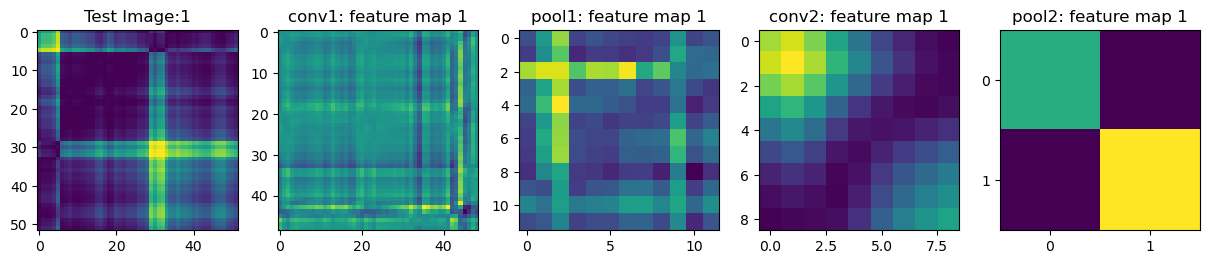

In [34]:
feature_map = 1
fig, ax = plt.subplots(1, 5, figsize = (15, 7))
for idx, level in enumerate(all_layers):
    ax[idx + 1].set_title(f'{level}: feature map {feature_map}')
    ax[idx + 1].imshow(all_layers[level][0][feature_map])
ax[4].set_xticks([0, 1])
ax[4].set_yticks([0, 1])

# plot image on first axes 
fi = test_features[1]
ax[0].set_title(f'Test Image:{1}')
ax[0].imshow(fi)

plt.show()
plt.tight_layout();

In [35]:
test_loss, test_accuracy, signals = cnn_model_opt.CNN_evaluate(test_data_loader)
print("Model Evaluation: Test-loss {}, Test-Accuracy {}".format(test_loss, test_accuracy))

Model Evaluation: Test-loss 0.7527439883599679, Test-Accuracy 0.6


## Backtest

In [36]:
# get original data 
h, w = train_data.image[0].shape
test_data_og = data_pre['original_data'][h*train_split: ].mean(axis = 1)
date_og = test_data_og.index

# get returns 
asset_returns = np.log(test_data_og/test_data_og.shift(1)).fillna(0).values # calculate continuously compounded returns

# labels pre 
sig_lb = np.zeros(shape = test_data_og.shape[0])
for t, l in enumerate(signals): 
    sig_lb[::h*(t+1) + 1] = l.item() # prediction after data batch 
sig_lb = np.where(sig_lb == 0, np.nan, sig_lb)
sig_lb = pd.Series(sig_lb).ffill(axis = 0).to_numpy()

# equity curve function (not used for equaity ploting)
def equity_curve(returns: np.ndarray, signals: list[int], initial_balance: float = 1.0, bnh:bool = False, fee:float = 0.0):
    e = initial_balance 
    strategy_returns = []
    equity_curve = []
    signals = pd.Series(signals) 
    pos_change = (signals - signals.shift(1)).fillna(0).to_numpy()
    
    direction = 1
    for t, pos in enumerate(pos_change):
        if not bnh:
            direction = signals[t] 
            change = np.sign(pos) # map change to interval [-1, 1]
            if change != 0:
                e -= 2*fee
        rt = (returns[t] * direction).item()
        factor = np.exp(rt).item()
        e *= factor 
        strategy_returns.append(rt)
        equity_curve.append(e)
    
    return equity_curve, strategy_returns

# calculate equity curve 
benchamrk_curve, _ = equity_curve(asset_returns, sig_lb, bnh = True)
strategy_curve, strategy_returns = equity_curve(asset_returns, sig_lb);

<Figure size 640x480 with 0 Axes>

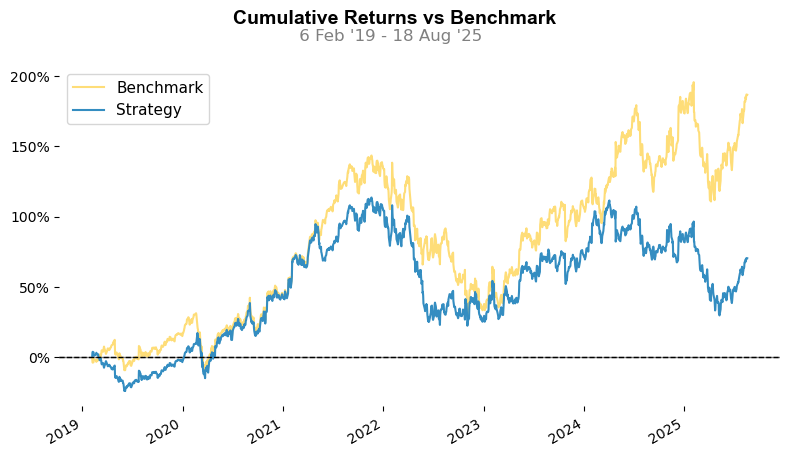

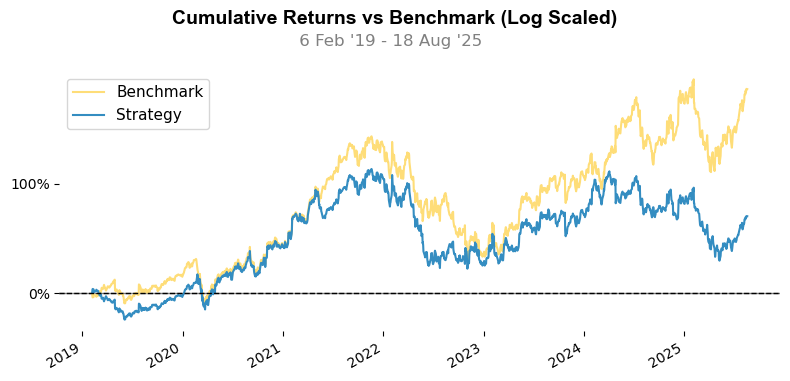

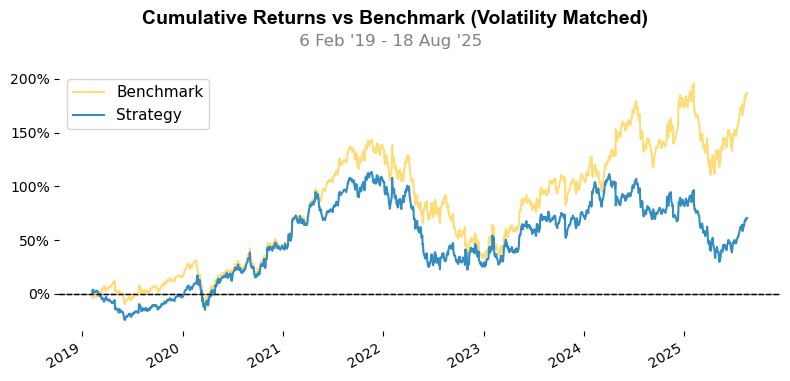

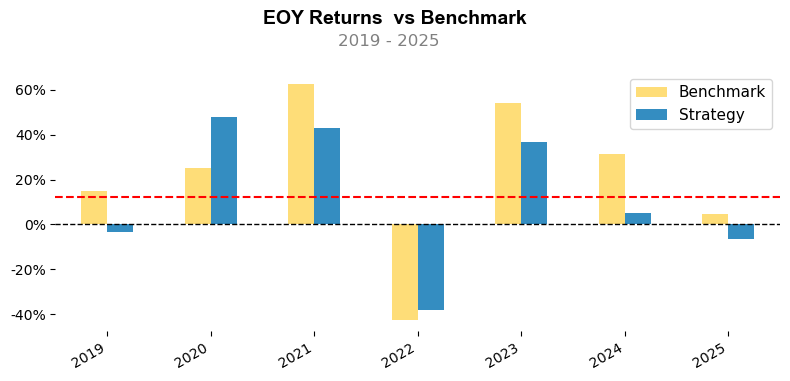

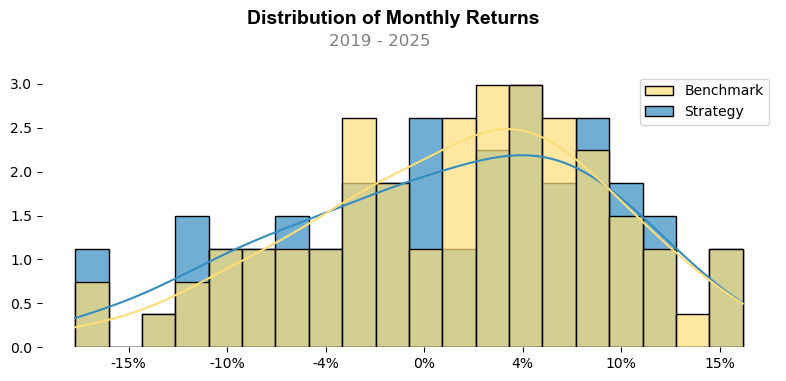

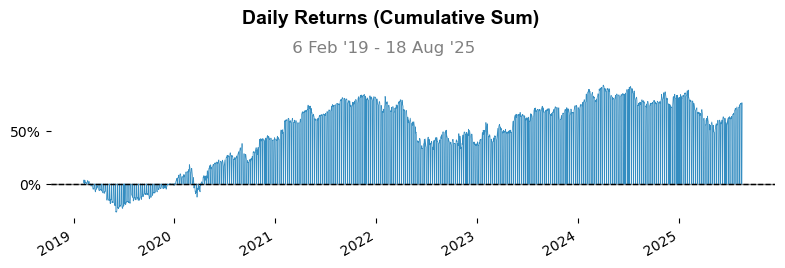

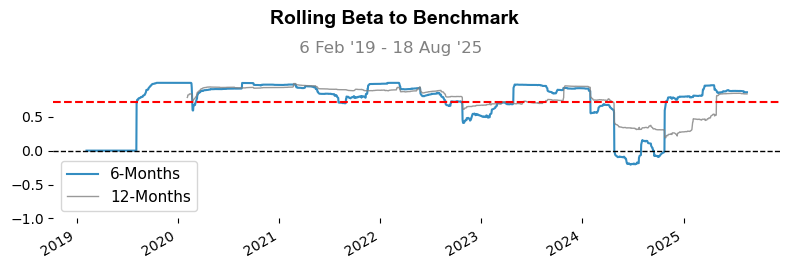

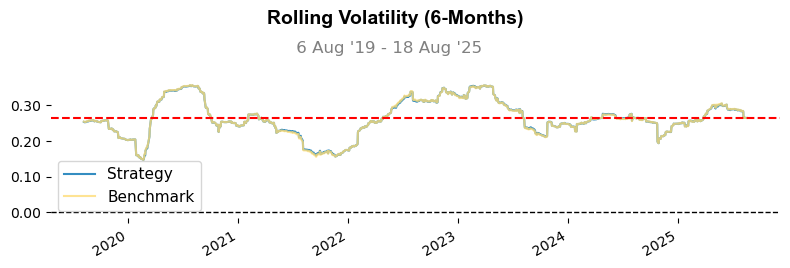

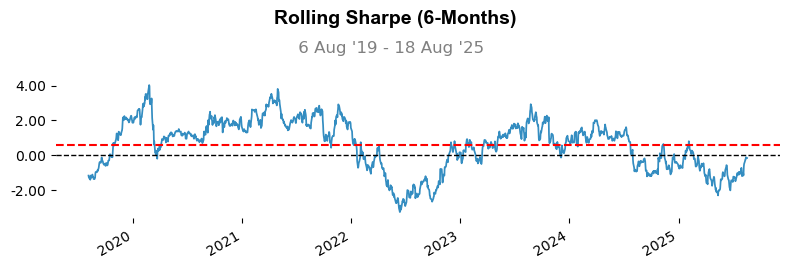

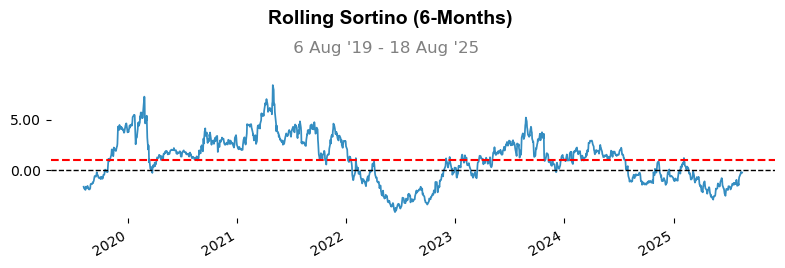

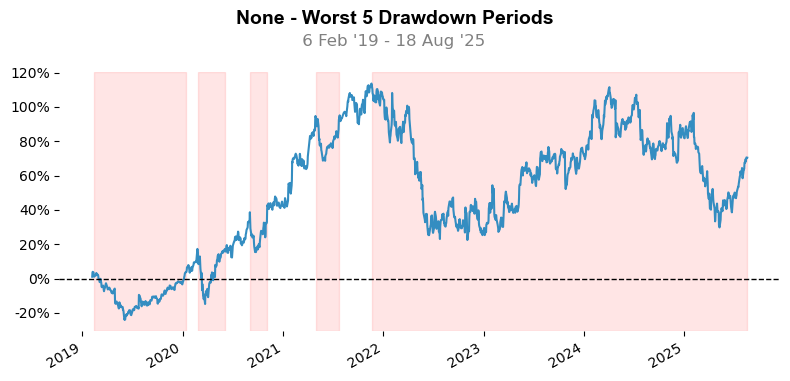

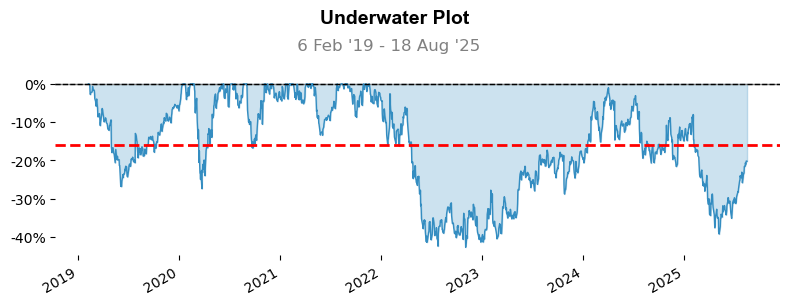

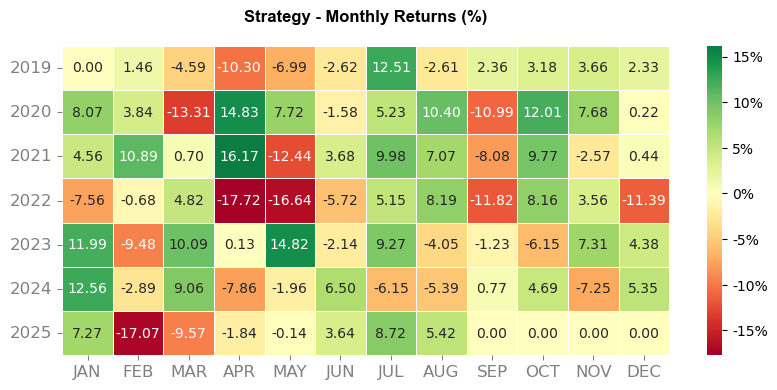

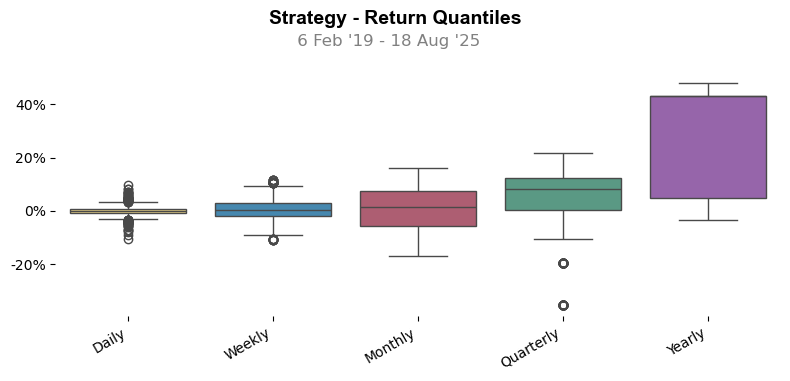

In [37]:
backtest_returns = pd.DataFrame({'bench_rt': asset_returns, 'strat_rt': strategy_returns}, index = date_og)
qs.reports.plots(returns = backtest_returns['strat_rt'], benchmark = backtest_returns['bench_rt'], mode = 'full')